## Data Science aplicado à manutenção preditiva: bombas d’água na Tanzânia

### Conhecendo o problema

O objetivo do projeto é prever, a partir de dados reais, quais bombas d'água estão a funcionar de forma correta, quais estão a necessitar de manutenção e quais não funcionam. É um caso de aplicação de data science em manutenção preditiva. 

A manutenção preditiva faz o acompanhamento periódico das máquinas, baseando-se na análise de dados coletados por meio de monitoramentos ou inspeções em campo. O principal objetiva da manutenção preditiva é a verificação pontual dos equipamentos a fim de antecipar eventuais problemas que possam causar gastos maiores com manutenções corretivas.

### Conhecendo os dados

Os dados utilizados foram fornecidos por : <a href='http://taarifa.org/'> Taarifa </a> e <a href='http://maji.go.tz/'>  Tanzanian Ministry of Water </a>.

Como foi falado, o objetivo é prever as condições de operação de cada ponto de fornecimento de água, a partir de dados fornecidos. Os dados estão estruturados da seguinte forma:

* amount_tsh - Total static head (quantidade de água disponível para o ponto de abastecimento)
* date_recorded - Data de gravação dos dados
* funder - Quem financiou o ponto de abastecimento
* gps_height - Altitude do ponto de abastecimento
* installer - Organização que instalou o ponto de abastecimento
* longitude - Coordenadas do GPS - longitude
* latitude - Coordenadas do GPS - latitude
* wpt_name - Nome do ponto de abastecimento, se houver um nome
* num_private - Sem informações sobre essa feature
* basin - Bacia hidrográfica
* subvillage - Localização geográfica 
* region - Localização geográfica 
* region_code - Localização geográfica  (código)
* district_code - Localização geográfica  (código)
* lga - Localização geográfica
* ward - Localização geográfica
* population - População nos arredores do ponto de abastecimento
* public_meeting - True/False
* recorded_by - Grupo que inseriu os dados
* scheme_management - Quem opera o ponto de abastecimento
* scheme_name - Quem opera o ponto de abastecimento
* permit - Se o ponto de abastecimento é permitido
* construction_year - Ano de construção do ponto de abastecimento
* extraction_type - Tipo de extração utilizado no ponto de abastecimento
* extraction_type_group - Tipo de extração utilizado no ponto de abastecimento
* extraction_type_class - Tipo de extração utilizado no ponto de abastecimento
* management - Como o ponto de abastecimento é gerenciado
* management_group - Como o ponto de abastecimento é gerenciado
* payment - Custos da água
* payment_type - forma de pagamento
* water_quality - A qualidade da água
* quality_group - A qualidade da água
* quantity - A quantidade de água
* quantity_group - A quantidade de água
* source - A fonte do ponto de abastecimento
* source_type - A fonte do ponto de abastecimento
* source_class - A fonte do ponto de abastecimento
* waterpoint_type - O tipo de ponto de abastecimento
* waterpoint_type_group - O tipo de ponto de abastecimento

E o grupo que define o estado de funcionamento das bombas está no arquivo train_label: functional, non functional ou functional needs repair

#### Observando os dados:

In [20]:
# Bibliotecas:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data = pd.read_csv('train.csv')
target = pd.read_csv('train_label.csv')

In [22]:
data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [23]:
target.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [24]:
print('data:',data.shape)
print('target:',target.shape)

data: (59400, 40)
target: (59400, 2)


#### Verificando o estado funcional dos pontos de abastecimento

Text(0.5,1,'Status(%)')

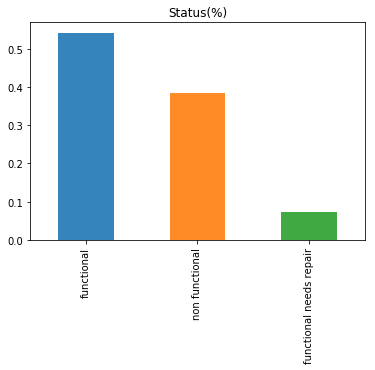

In [25]:
target.status_group.value_counts(normalize=True).plot(kind="bar",alpha=0.9)
plt.title("Status(%)")

Pode-se observar que boa parte dos pontos não estão a funcionar

#### Verificando as formas de pagamento pela utilização dos pontos de abastecimento

In [26]:
data.payment_type.value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

Text(0.5,1,'Forma de pagamento')

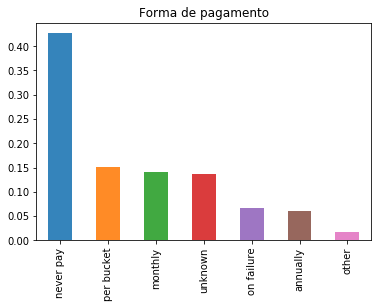

In [27]:
data.payment_type.value_counts(normalize=True).plot(kind="bar",alpha=0.9)
plt.title("Forma de pagamento")

Pode-se observar que boa parte dos pontos de abastecimento nunca recebem pagamento por sua utilização. 

#### Verificando a relação entre estado funcional e forma de pagamento

In [28]:
# Concatenar data e target(para o gráfico)
df = pd.concat([data,target.status_group], axis=1)

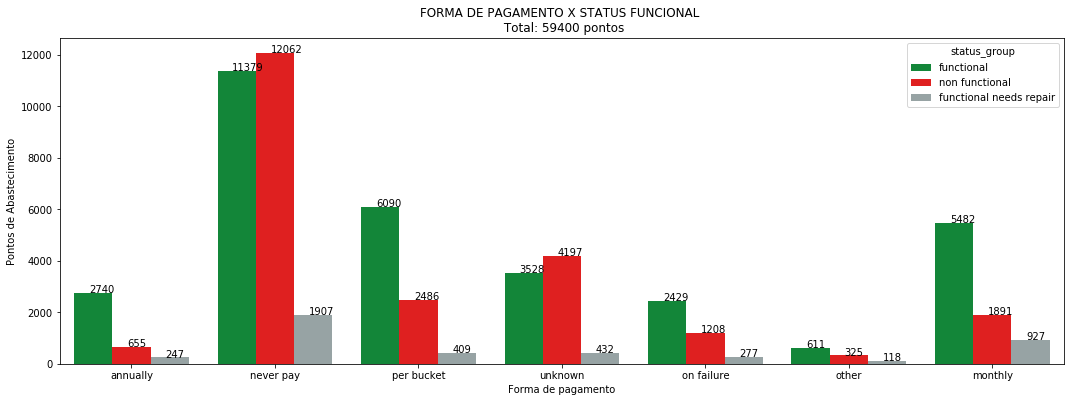

In [29]:
cores = ["#009933", "#ff0000", "#95a5a6"]
fig = plt.figure(figsize=(18,6))
dados = sns.countplot(data=df, x='payment_type', hue='status_group', palette=cores)

# Posicionando valores acima das barras
for p in dados.patches:
    b=p.get_bbox()
    dados.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.03, b.y1 + 15))

plt.title('FORMA DE PAGAMENTO X STATUS FUNCIONAL \n Total: %s pontos' % (df.shape[0]))
plt.xlabel('Forma de pagamento')
plt.ylabel('Pontos de Abastecimento')
plt.show()

#### Vamos verificar a relação entre quantidade de água e estado funcional

In [30]:
df.quantity.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

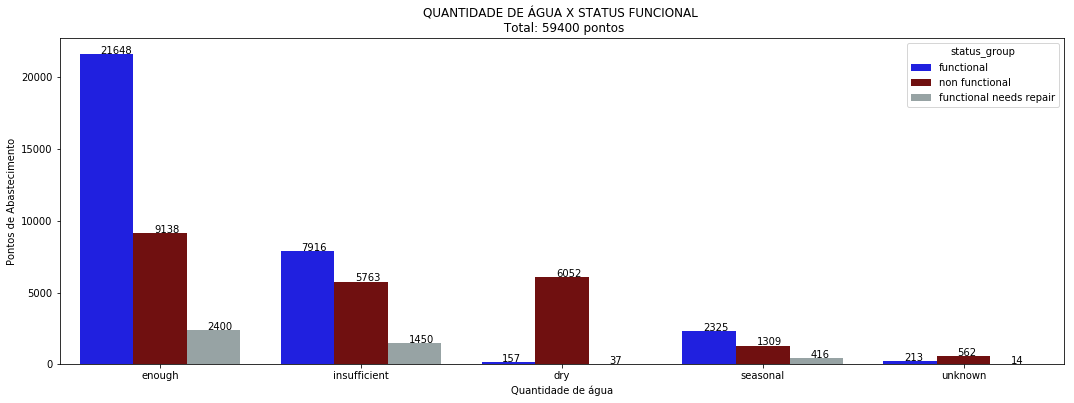

In [31]:
cores = ["#0000ff", "#800000", "#95a5a6"]
fig = plt.figure(figsize=(18,6))
dados = sns.countplot(data=df, x='quantity', hue='status_group', palette=cores)

# Posicionando valores acima das barras
for p in dados.patches:
    b=p.get_bbox()
    dados.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.03, b.y1 + 15))

plt.title('QUANTIDADE DE ÁGUA X STATUS FUNCIONAL \n Total: %s pontos' % (df.shape[0]))
plt.xlabel('Quantidade de água')
plt.ylabel('Pontos de Abastecimento')
plt.show()

Quando a quantidade de água é suficiente a maior parte dos pontos estão funcionando. Se justifica ter mais cuidado com esse pontos. Quando está seco, logicamente, o ponto não está a funcionar.

### Limpeza de dados

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

#### Eliminar informações sem importância

In [33]:
# Pontos que aparentemente não são importantes:
# wpt_name - Nome do ponto de abastecimento, se houver um nome - Não deve ser importante para o status do ponto de abast.
# recorded_by - Na feature recorded_by todos os valores são "GeoData Consultants Ltd". 
data.drop('wpt_name', axis=1, inplace=True)
data.drop('recorded_by', axis=1, inplace=True)

#### Colunas incompletas

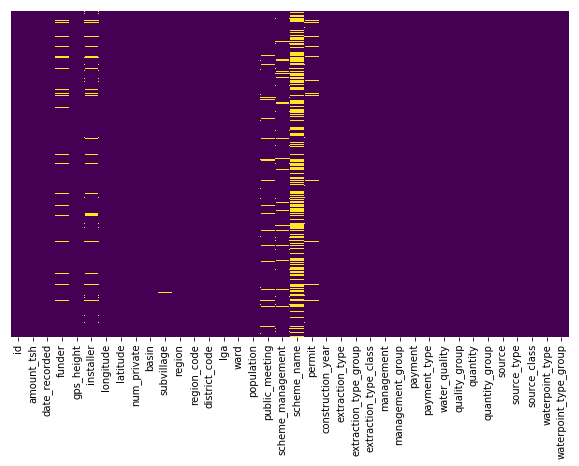

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(),cbar=False, yticklabels=False, cmap='viridis')
plt.show()

Pode-se observar que muitos dados são do tipo "object" e algumas colunas estão incompletas.

In [35]:
# Colunas incompletas:
# funder
# installer
# subvillage
# public_meeting
# scheme_management        
# scheme_name              
# permit

In [36]:
# Preencher os valores ausentes
for col in ['funder','installer','subvillage','public_meeting','scheme_management','scheme_name','permit']:
    data[col].fillna('SI', inplace=True) # SI = sem informações

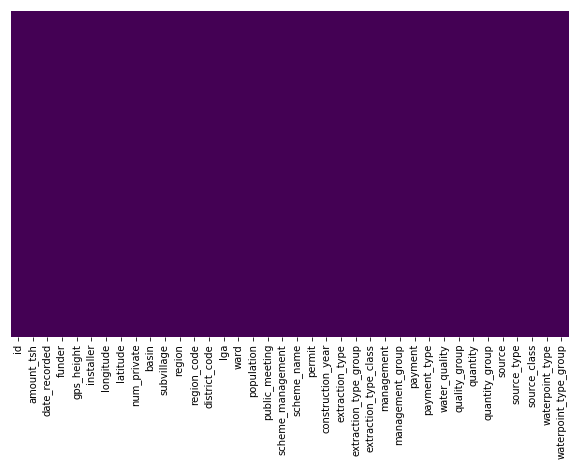

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(),cbar=False, yticklabels=False, cmap='viridis')
plt.show()

### Agrupando os casos raros

Algumas colunas com informações categóricas possuem um grande número de subgrupos. Isso pode ser um problema para a codificação. A técnica "one-hot" cria uma nova coluna para cada subgrupo da coluna original. Observando o exemplo a seguir temos um adeia do problema.

In [38]:
data.funder.value_counts()

Government Of Tanzania          9084
SI                              3635
Danida                          3114
Hesawa                          2202
Rwssp                           1374
World Bank                      1349
Kkkt                            1287
World Vision                    1246
Unicef                          1057
Tasaf                            877
District Council                 843
Dhv                              829
Private Individual               826
Dwsp                             811
0                                777
Norad                            765
Germany Republi                  610
Tcrs                             602
Ministry Of Water                590
Water                            583
Dwe                              484
Netherlands                      470
Hifab                            450
Adb                              448
Lga                              442
Amref                            425
Fini Water                       393
O

In [39]:
# Verificar features que possuem muitas 'categorias unitárias'.
for col in list(data):
    if data[col].dtype == 'O':
        print(col,':',len(data[col].unique()))

date_recorded : 356
funder : 1898
installer : 2145
basin : 9
subvillage : 19288
region : 21
lga : 125
ward : 2092
public_meeting : 3
scheme_management : 13
scheme_name : 2697
permit : 3
extraction_type : 18
extraction_type_group : 13
extraction_type_class : 7
management : 12
management_group : 5
payment : 7
payment_type : 7
water_quality : 8
quality_group : 6
quantity : 5
quantity_group : 5
source : 10
source_type : 7
source_class : 3
waterpoint_type : 7
waterpoint_type_group : 6


Pode-se verificar que os grupos "funder", "installer", "subvillage","ward" e "scheme_name" possuem muitas subgrupos unitários. Esse casos serão grupados em "raros".

In [40]:
# Agrupar os casos raros:
for col in ['funder', 'installer', 'subvillage','ward','scheme_name']:
    val = data[col].value_counts(normalize=False, sort=True, ascending=False)
    val_raros = [k for k in val.keys() if val[k]<50]
    if len(val_raros)>0:
        data.loc[data[col].isin(val_raros),col] = col+'_raros'

#### Tratando datas

Antes de codificar os dados vamos tratar as informações com datas, anos, etc.

In [41]:
data.date_recorded.head()

0    2011-03-14
1    2013-03-06
2    2013-02-25
3    2013-01-28
4    2011-07-13
Name: date_recorded, dtype: object

In [42]:
data.construction_year.head()

0    1999
1    2010
2    2009
3    1986
4       0
Name: construction_year, dtype: int64

#### date_recorded

Vamos atualizar os valores da coluna com os anos em relação à referência "2018-01-01"

In [43]:
#Atualizando a coluna "date_recorded" até a data de referência "2018-01-01". Valor em meses.
import datetime
d1= pd.to_datetime(data['date_recorded'])
d2 = pd.to_datetime('2018-01-01')
dias = abs(d2 - d1).dt.days
meses = dias/30
data['date_recorded'] = meses

In [44]:
data['date_recorded'].head()

0    82.833333
1    58.733333
2    59.033333
3    59.966667
4    78.800000
Name: date_recorded, dtype: float64

#### construction_year

Vamos atualizar os valores da coluna com os anos em relação à referência 2018.

In [45]:
# Verificando a média dos anos
data['construction_year'].mean() 

1300.6524747474748

Essa média está muito baixa. Isso pode ser explicado pela presença de muitos zeros na coluna.

In [46]:
# Calcular a média dos valores não-nulos
soma = 0
cont = 0
for i in data['construction_year']:
    if i != 0:
        soma = soma+i
        cont = cont+1
media = round(soma/cont)
media

1997

Vamos substituir os valores nulos pela média do conjunto:

In [47]:
# Substituindo os valores nulos pela média
data.loc[data['construction_year'] == 0,'construction_year'] = media

In [48]:
# Agora que 'construction_year' está completa, vou "contar os anos" em referência à 2018.
data['construction_year'] = 2018 - data['construction_year']

In [49]:
data['construction_year'].head()

0    19
1     8
2     9
3    32
4    21
Name: construction_year, dtype: int64

### cat.codes e get_dummies

Agora que os dados estão preparados, vamos utilizar dois métodos para codificar as informações categóricas. Para a coluna com muitos grupos vamos simplesmente numerar as categorias, com o auxílio da função cat.codes. Para a coluna poucas categorias vamos usar o get_dummies.

#### Dados categóricos que possuem vários subgrupos serão numerados.

In [50]:
for col in ['funder','installer','subvillage','lga','ward','scheme_name']:
    # Converter a coluna para 'category'
    data[col] = data[col].astype('category')
    # Criar uma nova coluna codificada
    data[col+'_new']=data[col].cat.codes
    # Eliminar a coluna original
    data.drop(col, axis=1, inplace=True)

#### Dados que possuem poucos subgrupos serão codificados com get_dummies.

In [51]:
for col in ['basin','region','public_meeting','scheme_management','permit','extraction_type','extraction_type_group','extraction_type_class','management','management_group','payment','payment_type','water_quality','quality_group','quantity','quantity_group','source','source_type','source_class','waterpoint_type','waterpoint_type_group']:
    nova_col = pd.get_dummies(data[col])
    data = pd.concat([data,nova_col],axis=1)
    data.drop(col, axis=1,inplace=True)

In [52]:
data.head()

,id,amount_tsh,date_recorded,gps_height,longitude,latitude,num_private,region_code,district_code,population,...,dam,hand pump,improved spring,other,cattle trough,communal standpipe,dam,hand pump,improved spring,other
0,69572,6000.0,82.833333,1390,34.938093,-9.856322,0,11,5,109,...,0,0,0,0,0,1,0,0,0,0
1,8776,0.0,58.733333,1399,34.698766,-2.147466,0,20,2,280,...,0,0,0,0,0,1,0,0,0,0
2,34310,25.0,59.033333,686,37.460664,-3.821329,0,21,4,250,...,0,0,0,0,0,1,0,0,0,0
3,67743,0.0,59.966667,263,38.486161,-11.155298,0,90,63,58,...,0,0,0,0,0,1,0,0,0,0
4,19728,0.0,78.800000,0,31.130847,-1.825359,0,18,1,0,...,0,0,0,0,0,1,0,0,0,0


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Columns: 192 entries, id to other
dtypes: float64(4), int16(3), int64(7), int8(3), uint8(175)
memory usage: 15.4 MB


In [35]:
data.describe()

,id,amount_tsh,date_recorded,gps_height,longitude,latitude,num_private,region_code,district_code,population,...,dam,hand pump,improved spring,other,cattle trough,communal standpipe,dam,hand pump,improved spring,other
count,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,...,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,70.120566,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,...,0.000118,0.294411,0.013199,0.107407,0.001953,0.582912,0.000118,0.294411,0.013199,0.107407
std,21453.128371,2997.574558,11.140546,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,...,0.010855,0.455781,0.114126,0.309633,0.044148,0.493082,0.010855,0.455781,0.114126,0.309633
min,0.000000,0.000000,49.666667,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,59.566667,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37061.500000,0.000000,63.633333,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,55656.500000,20.000000,82.233333,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,74247.000000,350000.000000,185.266667,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Atualizar coluna gps_height

In [54]:
data['gps_height'] = abs(data['gps_height'])

In [55]:
data['gps_height'].describe()

count    59400.000000
mean       669.304310
std        692.143911
min          0.000000
25%          0.000000
50%        369.000000
75%       1319.250000
max       2770.000000
Name: gps_height, dtype: float64

### Codificar a coluna Status_group

In [56]:
# Codificar o 'target'
 # Converter a coluna para 'category'
target['status_group'] = target['status_group'].astype('category')
# Criar uma nova coluna codificada
target['status_group_new']=target['status_group'].cat.codes
# # Eliminar a coluna original
# target.drop('status_group', axis=1, inplace=True)

In [57]:
target.head()

,id,status_group,status_group_new
0,69572,functional,0
1,8776,functional,0
2,34310,functional,0
3,67743,non functional,2
4,19728,functional,0


Agora sim. Dados prontos. Vamos ao classificador.

### Criando o classificador

#### Nossa mala de ferramentas

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier

#### Primeiramente vamos dividir o conjunto de dados em conjuntos de treino e teste

In [59]:
# Vamos reservar 20% dos dados para testes
all_X = data
all_y = target['status_group_new']
train_X, test_X, train_y, test_y = train_test_split(all_X, all_y, test_size=0.20,random_state=0)

### Regressão Logística multinomial

A regressão logística é uma técnica estatística que tem como objetivo produzir, a partir de um conjunto de observações, um modelo que permita a predição de valores tomados por uma variável categórica, a partir de uma série de variáveis.

É possível estimar uma regressão logística em que a variável dependente tem mais de duas categorias. Ou seja, o modelo logístico pode ser estendido quando a variável resposta qualitativa tem mais do que duas categorias. No nosso caso essas categorias são os estados funcionais dos pontos de abastecimento.

São geradas k – 1 equações, sendo k o número de categorias. As equações geram probabilidades para predizer se uma
categoria está acima/abaixo da categoria de referência.

In [42]:
rl = LogisticRegression(random_state=0, multi_class='ovr')

In [44]:
rl.fit(train_X, train_y)
predictions = rl.predict(test_X)
accuracy = accuracy_score(test_y, predictions)
print(accuracy)

0.7197811447811447


In [46]:
# Validação cruzada
scores = cross_val_score(lr, all_X, all_y, cv=5)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.70255029 0.71085859 0.71616162 0.71904722 0.73471965]
0.7166674720840223


### Random Forest

O algoritmo Random Forest é um tipo de ensemble learning, método que gera muitos classificadores e combina o seus resultados.

No caso do Random Forest, o algoritmo gera várias árvores de decisão, e combina o resultado da classificação de todas elas. Essa combinação de modelos, o torna muito mais poderoso do que o algoritmo Decision Tree convencional. 
Por ser um conjunto de Decision Trees, o objeto RandomForestClassifier possui vários fatores adicionais, entre eles pode-se destacar: 

<b> n_estimators>:</b> É o número de estimadores (Decision Trees) que serão utilizados pelo Random Forest.

<b>n_jobs:</b> É o número de execuções em paralelo que serão usadas pelo modelo, ao passar -1, o valor será igual ao número de núcleos do computador utilizado. Quanto mais “paralelizado” for a execução, mais rápido ela será, desde que a máquina suporte.

<b>max_features:</b> É o número de features que será utilizado por cada Decision Tree interna, são sorteadas features diferentes para cada árvores, justamente para serem classificadores diferentes.


In [69]:
rf = RandomForestClassifier(n_estimators=20)

In [70]:
rf.fit(train_X, train_y)
predictions = rf.predict(test_X)
accuracy = accuracy_score(test_y, predictions)
print(accuracy)

0.8032828282828283


In [71]:
# Validação cruzada
scores = cross_val_score(rf, all_X, all_y, cv=5)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.79744065 0.80218855 0.80254187 0.8037037  0.80902281]
0.8029795171146471


### Apêndice

#### Exemplo de funcionamento do get_dummies

In [21]:
df = pd.DataFrame({'Estados': ['RJ', 'SP', 'MG','ES']})
df

,Estados
0,RJ
1,SP
2,MG
3,ES


In [22]:
pd.get_dummies(df)

,Estados_ES,Estados_MG,Estados_RJ,Estados_SP
0,0,0,1,0
1,0,0,0,1
2,0,1,0,0
3,1,0,0,0
